In [3]:
import urllib.request
import json
import pprint
from pprint import pprint
import pandas as pd

In [4]:
# https://stackoverflow.com/questions/40588852/pandas-read-nested-json
dfUSA = pd.read_csv('data/awardsUSA.csv')

In [5]:
dfUSA.head()

,Unnamed: 0,Company,Award_Title,Agency,Branch,Phase,Program,Agency_Tracking_Number,Contract,Proposal_Award_Date,...,Contact_Email,PI_Name,PI_Title,PI_Phone,PI_Email,RI_Name,RI_POC_Name,RI_POC_Phone,Research_Keywords,Abstract
0,0,CU AEROSPACE L.L.C.,Scalable and Distributed Inertial Navigation S...,National Aeronautics and Space Administration,NaN,Phase II,STTR,183162,80NSSC20C0020,"December 18, 2019",...,carroll@cuaerospace.com,David Carroll,NaN,(217) 239-1703,carroll@cuaerospace.com,University of Illinois at Urbana-Champaign,NaN,NaN,NaN,Current state of the art inertial measurement ...
1,1,"Space Lab Technologies, LLC",MarsOasis- An Efficient Autonomously Controlle...,National Aeronautics and Space Administration,NaN,Phase II,STTR,182932,80NSSC20C0038,"December 20, 2019",...,chris@spacelabtech.com,Christine Escobar,NaN,(720) 309-8475,chris@spacelabtech.com,Regents of the University of Colorado,NaN,NaN,NaN,The MarsOasistrade; cultivation system is a ve...
2,2,"UbiQD, Inc",Tailoring the Solar Spectrum for Enhanced Crop...,National Aeronautics and Space Administration,NaN,Phase II,STTR,188052,80NSSC20C0024,"January 10, 2020",...,matt@ubiqd.com,Matthew Bergren,NaN,(505) 310-6766,matt@ubiqd.com,University of Arizona,NaN,NaN,NaN,"UbiQD, Inc,nbsp;has partnered with the Univers..."
3,3,"Opterus Research and Development, Inc.",Validated Engineering Tools for Thin-Ply Compo...,National Aeronautics and Space Administration,NaN,Phase II,STTR,185482,80NSSC20C0025,"January 10, 2020",...,tmurphey@opterusrd.com,Thomas Murphey,NaN,(505) 250-3006,tmurphey@opterusrd.com,COLORADO STATE UNIVERSITY,NaN,NaN,NaN,"Opterus Research and Development, Inc. propose..."
4,4,HINETICS LLC,Integrated High Frequency Electric Propulsor f...,National Aeronautics and Space Administration,NaN,Phase II,SBIR,188322,80NSSC20C0008,"December 18, 2019",...,Steven.M.Brockway@nasa.gov,Andy Yoon,NaN,(630) 442-9517,ayoon@hinetics.com,NaN,NaN,NaN,NaN,We propose the development of a high efficienc...


In [9]:
dfUSA['City'] = dfUSA['City'].str.lower()

In [10]:
# Extraction of ZIP adapted from https://stackoverflow.com/questions/51607400/how-to-extract-first-8-characters-from-a-string-in-pandas
dfUSA['ZIP5'] = dfUSA['Zip'].str[:5]

In [11]:
dfUSA['ZIP5'].head()

0    61822
1    80301
2    87544
3    80526
4    61820
Name: ZIP5, dtype: object

In [12]:
dfUSA18=dfUSA[(dfUSA['Award_Year'] == 2018)]

In [13]:
dfUSA[(dfUSA['Award_Year'] == 2018)].groupby('RI_Name').Award_Amount.sum().sort_values(ascending=False).head(50)

RI_Name
UNIVERSITY OF PENNSYLVANIA                                       5639480.00
WASHINGTON UNIVERSITY                                            5524117.00
MASSACHUSETTS GENERAL HOSPITAL                                   5485369.00
DUKE UNIVERSITY                                                  4973839.00
Southwest Research Institute                                     4449041.00
University of Utah                                               4293250.00
BAYLOR COLLEGE OF MEDICINE                                       3961834.00
UNIVERSITY OF CALIFORNIA, SAN DIEGO                              3634644.00
Arizona State University                                         3532966.44
Johns Hopkins University                                         3349153.00
GEORGIA STATE UNIVERSITY                                         3332902.00
Woods Hole Oceanographic Institution                             3299840.00
University of Central Florida                                    3017049.00
Univ

In [14]:
dfUSA.groupby('RI_Name').Award_Amount.sum().sort_values(ascending=False).head(50)

RI_Name
Stub                                        36113044.00
DUKE UNIVERSITY                             15397753.00
UNIV OF NORTH CAROLINA CHAPEL HILL          14664425.00
Purdue University                           13824239.33
Arizona State University                    13013554.44
WASHINGTON UNIVERSITY                       12953884.00
North Carolina State University             12448765.84
Southwest Research Institute                12176993.00
University of Maryland                      12080992.00
UNIVERSITY OF WASHINGTON                    11505037.00
UNIVERSITY OF PENNSYLVANIA                  10989527.00
Lawrence Berkeley National Laboratory       10498421.00
MASSACHUSETTS GENERAL HOSPITAL              10322909.00
UNIVERSITY OF ILLINOIS AT CHICAGO           10275499.00
University of Utah                          10113047.00
Georgia Institute of Technology              9242959.00
Pennsylvania State University                9103878.10
UNIV OF MASSACHUSETTS MED SCH WORCESTER 

In [30]:
dfUSA[(dfUSA['ZIP5'] == '02138')].groupby('Agency').Award_Amount.sum().sort_values(ascending=False)

Agency
Department of Defense                            97926500.44
Department of Health and Human Services          27850747.00
National Science Foundation                       5316188.00
National Aeronautics and Space Administration     4102038.00
Department of Energy                              3847441.60
Department of Homeland Security                   2809211.56
Department of Transportation                      2040658.00
Department of Agriculture                         1059299.00
Name: Award_Amount, dtype: float64

In [8]:
dfUSA18[(dfUSA18['City'] == 'torrance')].groupby('Agency').size().sort_values(ascending=False).head(50)

Agency
Department of Defense                            78
Department of Energy                             12
National Aeronautics and Space Administration     8
Department of Homeland Security                   3
Department of Health and Human Services           3
Environmental Protection Agency                   1
Department of Transportation                      1
dtype: int64

In [10]:
dfUSA18[(dfUSA18['State'] == 'CA')].groupby('Agency').size().sort_values(ascending=False).head(50)

Agency
Department of Defense                            409
Department of Health and Human Services          319
Department of Energy                             121
National Aeronautics and Space Administration    103
National Science Foundation                      100
Department of Agriculture                         17
Department of Commerce                            15
Department of Homeland Security                    6
Department of Education                            5
Environmental Protection Agency                    4
Department of Transportation                       2
dtype: int64

In [14]:
dfUSA18[(dfUSA18['City'] == 'san diego')].groupby('Agency').size().sort_values(ascending=False)

Agency
Department of Defense                            75
Department of Health and Human Services          64
National Science Foundation                       8
National Aeronautics and Space Administration     5
Department of Energy                              5
Department of Homeland Security                   1
dtype: int64

In [15]:
dfUSA18[(dfUSA18['City'] == 'san diego')].groupby('Company').size().sort_values(ascending=False).head(50)


Company
ENGINEERING AND SOFTWARE SYSTEM SOLUTIONS, INC    10
Space Micro Inc.                                   8
Innoflight, Inc.                                   7
ATA Engineering, Inc.                              5
ELECTRONIC BIOSCIENCES, INC.                       4
SAN DIEGO COMPOSITES, INC.                         4
VALA SCIENCES, INC.                                4
NU TREK INC                                        4
MAPP BIOPHARMACEUTICAL, INC.                       3
Orpro Therapeutics, Inc.                           3
Spectral Labs Incorporated                         3
SURFACE OPTICS CORP.                               3
Fuse Integration, Inc.                             3
Ocean Nano Tech LLC                                3
Epigen Biosciences, Inc.                           3
RAM LABORATORIES                                   3
P&amp;J ROBINSON CORP                              2
DIGITAL PROTEOMICS LLC                             2
PACIFIC SCIENCE &amp; ENGINEERING GROU

In [16]:
dfUSA18[(dfUSA18['City'] == 'austin')].groupby('Company').size().sort_values(ascending=False).head(50)


Company
NANOHMICS INC                                      17
Texas Research Institute, Austin, Inc.             16
Omega Optics, Inc.                                  4
Silicon Space Technology Corporation                3
ASURAGEN, INC.                                      3
KAI, LLC                                            3
Systems &amp; Materials Research Corporation        3
SPERAGEN, INC.                                      2
PAIN THERAPEUTICS, INC.                             2
Cesiumastro Inc.                                    2
Via Therapeutics, LLC                               2
ImmuDX LLC                                          2
Sandbox Semiconductor Incorporated                  2
Systems &amp; Processes Engineering Corporation     2
GenXComm, Inc                                       2
FoVI 3D, Inc.                                       1
Electroninks Incorporated                           1
WINDMILL CARDIOVASCULAR SYSTEMS, INC.               1
Crossfield Technolog

In [17]:
dfUSA18[(dfUSA18['State'] == 'CA')].groupby('City').size().sort_values(ascending=False).head(50)

City
san diego              158
torrance               106
san francisco           52
sunnyvale               34
santa barbara           33
berkeley                30
goleta                  29
palo alto               22
mountain view           20
los gatos               20
irvine                  19
los angeles             19
santa monica            18
san mateo               17
santa clara             15
carlsbad                15
pasadena                14
la jolla                14
winnetka                14
san jose                13
culver city             12
monrovia                12
hayward                 12
redwood city            10
menlo park              10
los altos                9
lake forest              9
sherman oaks             8
pleasanton               8
camarillo                8
encinitas                8
riverside                7
san ramon                7
el segundo               7
burlingame               7
northridge               6
scotts valley          

In [18]:
dfUSA18[(dfUSA18['State'] == 'TX')].groupby('City').size().sort_values(ascending=False).head(50)

City
austin             89
college station    41
houston            38
san antonio        16
dallas             11
richardson          9
plano               6
sachse              3
lubbock             3
galveston           3
fort worth          3
round rock          2
rockwall            2
san marcos          2
bryan               2
conroe              2
webster             2
georgetown          2
cypress             2
college             1
benbrook            1
coppell             1
woodlands           1
el paso             1
elgin               1
itasca              1
keller              1
pearland            1
sugar land          1
temple              1
tyler               1
arlington           1
dtype: int64

In [19]:
dfUSA18[(dfUSA18['State'] == 'OH')].groupby('City').size().sort_values(ascending=False).head(50)

City
dayton            48
columbus          38
beavercreek       24
cleveland         15
cincinnati        13
fairborn          11
solon             10
miamisburg         9
akron              8
englewood          7
westerville        7
euclid             6
dublin             5
cedarville         3
middletown         3
lewis center       2
shaker heights     2
rocky river        2
westlake           2
mt. sterling       2
wooster            2
milford            1
reynoldsburg       1
miamisburg,        1
springboro         1
cuyahoga falls     1
kent               1
strongsville       1
toledo             1
valley view        1
pepper pike        1
canfield           1
powell             1
beachwood          1
columbuws          1
dtype: int64

In [20]:
dfUSA18[(dfUSA18['State'] == 'MN')].groupby('City').size().sort_values(ascending=False).head(50)

City
minneapolis        17
saint paul         16
eden prairie       16
maple grove         6
rochester           4
plymouth            4
anoka               2
buffalo             2
edina               1
hopkins             1
loretto             1
worthington         1
white bear lake     1
osseo               1
rosemount           1
roseville           1
st. paul            1
oakdale             1
dtype: int64

In [22]:
dfUSA18[(dfUSA18['City'] == 'dayton')].groupby('Agency').size().sort_values(ascending=False).head(50)

Agency
Department of Defense                            42
Department of Energy                              4
National Aeronautics and Space Administration     2
dtype: int64

In [31]:
dfUSA18[(dfUSA18['City'] == 'beavercreek')].groupby('Agency').size().sort_values(ascending=False).head(50)

Agency
Department of Defense                      23
Department of Health and Human Services     1
Department of Energy                        1
dtype: int64

In [260]:
dfUSA[(dfUSA['State'] == 'MA')].groupby('City').size().sort_values(ascending=False).head(50)

City
cambridge          524
woburn             252
andover            232
chelmsford         163
boston             147
watertown          146
newton             116
burlington         104
bedford             92
lexington           80
natick              79
billerica           54
waltham             51
somerville          49
amherst             46
worcester           43
brookline           38
north billerica     37
medford             30
belmont             29
westford            22
winchester          22
sharon              22
needham             20
wellesley           19
marlborough         19
holliston           18
framingham          17
charlton            17
lowell              14
sudbury             14
canton              13
beverly             13
weston              12
walpole             12
brighton            12
wilmington          11
norwood             11
sturbridge          10
chestnut hill       10
acton               10
auburndale           9
arlington            9
barnst

In [262]:
dfUSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27596 entries, 0 to 27595
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               27596 non-null  int64  
 1   Company                                  27596 non-null  object 
 2   Award_Title                              27596 non-null  object 
 3   Agency                                   27596 non-null  object 
 4   Branch                                   16144 non-null  object 
 5   Phase                                    27596 non-null  object 
 6   Program                                  27596 non-null  object 
 7   Agency_Tracking_Number                   27596 non-null  object 
 8   Contract                                 27595 non-null  object 
 9   Proposal_Award_Date                      27072 non-null  object 
 10  Contract_End_Date                        26911

In [261]:
dfUSA.groupby('City').size().sort_values(ascending=False).head(50)

City
san diego          749
torrance           562
cambridge          524
huntsville         463
austin             431
rockville          373
boulder            366
dayton             305
ann arbor          292
san francisco      268
tucson             261
hanover            257
woburn             252
albuquerque        237
andover            233
college station    227
seattle            209
durham             197
new york           197
santa barbara      193
salt lake city     189
roanoke            189
pittsburgh         184
houston            174
sunnyvale          171
lexington          166
chelmsford         163
champaign          159
charlottesville    151
goleta             150
berkeley           150
baltimore          149
boston             147
watertown          146
arlington          145
madison            145
los angeles        144
atlanta            138
chapel hill        137
wheat ridge        135
orlando            134
columbus           128
columbia           125
palo a

In [244]:
dfUSA.groupby('City').size().describe()

count    2230.000000
mean       12.374888
std        38.529571
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max       722.000000
dtype: float64

In [246]:
dfUSA[(dfUSA['State'] == 'MA')].groupby('City').size().describe()

count    167.000000
mean      17.437126
std       50.798034
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max      498.000000
dtype: float64

In [247]:
dfUSA[(dfUSA['State'] == 'TX')].groupby('City').size().describe()

count     82.000000
mean      15.097561
std       54.118437
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      409.000000
dtype: float64

In [248]:
dfUSA[(dfUSA['State'] == 'CA')].groupby('City').size().describe()

count    379.000000
mean      14.844327
std       53.124388
min        1.000000
25%        1.000000
50%        3.000000
75%        8.500000
max      722.000000
dtype: float64

In [277]:
dfUSA[(dfUSA['State'] == 'CA')].groupby('City').Award_Amount.mean().sort_values(ascending=False).head(25)

City
sebastopol              2.384795e+06
walnut                  1.984704e+06
half moon bay           1.833774e+06
la canada flintridge    1.781090e+06
fullerton               1.749332e+06
rohnert park            1.740879e+06
mountain view,          1.534484e+06
n. webster              1.500000e+06
compton                 1.498643e+06
playa del rey           1.495733e+06
fallbrook               1.483265e+06
azusa                   1.250736e+06
south pasadena          1.151495e+06
beaverton               9.999995e+05
hawyard                 9.997925e+05
alameda,                9.968470e+05
brea                    9.922800e+05
emerald hills           9.763245e+05
piedmont                9.682947e+05
sacrtamento             9.580778e+05
aliso viejo             9.417604e+05
beverly hills           9.215208e+05
union city              9.070138e+05
sherman oaks            9.000000e+05
boulder                 9.000000e+05
Name: Award_Amount, dtype: float64

In [283]:
dfUSA[(dfUSA['State'] == 'CA')].groupby('Agency').Award_Amount.mean().sort_values(ascending=False).head(25)

Agency
Department of Health and Human Services          649177.396126
Department of Energy                             470914.531859
Department of Education                          468733.737917
Department of Defense                            448858.145253
Department of Homeland Security                  434490.123182
National Science Foundation                      359417.176587
Department of Transportation                     341140.672500
National Aeronautics and Space Administration    331126.207679
Department of Agriculture                        229331.773196
Department of Commerce                           216861.326935
Environmental Protection Agency                  156953.759286
Name: Award_Amount, dtype: float64

In [40]:
dfUSA18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5622 entries, 1011 to 27491
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               5622 non-null   int64  
 1   Company                                  5622 non-null   object 
 2   Award_Title                              5622 non-null   object 
 3   Agency                                   5622 non-null   object 
 4   Branch                                   2935 non-null   object 
 5   Phase                                    5622 non-null   object 
 6   Program                                  5622 non-null   object 
 7   Agency_Tracking_Number                   5622 non-null   object 
 8   Contract                                 5622 non-null   object 
 9   Proposal_Award_Date                      5521 non-null   object 
 10  Contract_End_Date                        550

In [41]:
dfUSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27596 entries, 0 to 27595
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               27596 non-null  int64  
 1   Company                                  27596 non-null  object 
 2   Award_Title                              27596 non-null  object 
 3   Agency                                   27596 non-null  object 
 4   Branch                                   16144 non-null  object 
 5   Phase                                    27596 non-null  object 
 6   Program                                  27596 non-null  object 
 7   Agency_Tracking_Number                   27596 non-null  object 
 8   Contract                                 27595 non-null  object 
 9   Proposal_Award_Date                      27072 non-null  object 
 10  Contract_End_Date                        26911

In [42]:
dfUSA.groupby('Award_Year').size().sort_values(ascending=False)

Award_Year
2017    5996
2018    5622
2016    5410
2019    5337
2015    5176
2020      55
dtype: int64

In [45]:
dfUSA18[(dfUSA18['State'] == 'IA')].groupby('Agency').size().sort_values(ascending=False)

Agency
Department of Health and Human Services    7
Department of Defense                      6
Department of Agriculture                  4
National Science Foundation                3
Department of Energy                       3
dtype: int64

In [47]:
dfUSA18[(dfUSA18['State'] == 'KS')].groupby('Agency').Award_Amount.sum().sort_values(ascending=False)

Agency
Department of Health and Human Services          5527155.0
National Science Foundation                      1170181.0
Department of Energy                              374048.0
National Aeronautics and Space Administration     245221.0
Department of Agriculture                          99920.0
Department of Defense                              98454.8
Name: Award_Amount, dtype: float64

In [39]:
dfUSA18[(dfUSA18['Agency'] == 'Department of Energy')].groupby('ZIP5').Award_Amount.sum().sort_values(ascending=False).head(5)

ZIP5
80301    9035173.00
90404    6746669.00
60201    6218162.17
32955    5596379.42
14624    5343197.00
Name: Award_Amount, dtype: float64

In [275]:
dfUSA[(dfUSA['State'] == 'CO')].groupby('City').Award_Amount.mean().sort_values(ascending=False).head(50)

City
frederick            793700.000000
loveland,            749166.000000
northglenn           741231.000000
westminster          738064.622222
aurora               660711.640000
englewood            649250.285714
pine                 568774.000000
monument             564406.036667
colorado  springs    562466.500000
windsor              560643.250000
buena vista          554850.000000
centennial           527741.500000
parker               500999.800000
golden               498227.000667
erie                 484623.500000
boulder              482419.460302
loveland             467527.600000
berthoud             446869.375000
louisville           443859.436207
colorado springs     438079.294804
fort collins         434700.641340
larkspur             432714.863125
lafayette            413504.565889
wheat ridge          394422.967778
broomfield           378005.913043
littleton            369219.439508
lakewood             355644.277368
denver               354495.146667
longmont       

In [19]:
dfMINK.head()

,Company,Award_Title,Agency,Branch,Phase,Program,Agency_Tracking_Number,Contract,Proposal_Award_Date,Contract_End_Date,...,DUNS,Hubzone_Owned,Socially_and_Economically_Disadvantaged,Woman_Owned,Number_Employees,City,State,ZIP5,Zip,Abstract
0,"Pacific Engineering, Inc.",Lightweight RSG Launcher Components and AURE C...,Department of Defense,Navy,Phase II,SBIR,N102-144-0885,N00024-12-C-4127,26-Jan-12,26-Jan-14,...,177984879,N,Y,N,8.0,Roca,NE,68430,68430,NAVSEA Undersea Defensive Warfare Systems Prog...
1,NANOVA INC.,Improved long-term biocompatibility of coronar...,Department of Health and Human Services,National Institutes of Health,Phase II,SBIR,R44HL097485,2R44HL097485-04A1,15-May-17,31-Mar-21,...,800407343,N,N,N,NaN,Columbia,MO,65203,65203-6469,Improved long term biocompatibility of coronar...
2,"APT THERAPEUTICS, INC.",Human Apyrase Therapy for Acute Ischemic Stroke,Department of Health and Human Services,NaN,Phase II,SBIR,SB1NS060175,2SB1NS060175-04,1-Aug-16,31-Jul-19,...,192266141,N,N,N,NaN,Saint Louis,MO,63132,63132-2900,Principal Investigator Program DirectorLastFir...
3,"J &amp; J Solutions, Inc.",Innovative Device to Improve Safety of Prepari...,Department of Health and Human Services,NaN,Phase II,SBIR,R44CA153636,2R44CA153636-04,NaN,NaN,...,827056123,N,N,N,0.0,IOWA CITY,IA,52245,52245-6206,? DESCRIPTION (provided by applicant): Man...
4,"J &amp; J Solutions, Inc.",Innovative Device to Improve Safety of Prepari...,Department of Health and Human Services,NaN,Phase II,SBIR,R44CA153636,2R44CA153636-04,23-Sep-14,31-Aug-17,...,827056123,N,N,N,NaN,Iowa City,IA,52245,52245-6206,DESCRIPTION provided by applicant Manual dr...


In [20]:
dfMINK.groupby('Agency').count().sort_values('State', ascending=False)

,Company,Award_Title,Branch,Phase,Program,Agency_Tracking_Number,Contract,Proposal_Award_Date,Contract_End_Date,Solicitation_Number,...,DUNS,Hubzone_Owned,Socially_and_Economically_Disadvantaged,Woman_Owned,Number_Employees,City,State,ZIP5,Zip,Abstract
Agency,,,,,,,,,,,,,,,,,,,,,
Department of Health and Human Services,365,365,137,365,365,365,365,224,225,344,...,365,365,365,365,130,365,365,365,365,365
Department of Defense,213,213,213,213,213,213,213,213,180,213,...,213,213,213,213,213,213,213,213,213,213
National Science Foundation,104,104,0,104,104,104,104,87,87,17,...,102,104,104,104,104,104,104,104,104,104
Department of Agriculture,75,75,0,75,75,75,67,45,37,16,...,75,75,75,75,67,75,75,75,75,75
National Aeronautics and Space Administration,48,48,0,48,48,48,48,48,48,15,...,47,48,48,48,48,48,48,48,48,48
Department of Energy,46,46,3,46,46,46,45,44,41,43,...,46,46,46,46,44,46,46,46,46,46
Department of Education,7,7,3,7,7,7,6,6,6,3,...,7,7,7,7,2,7,7,7,7,7
Department of Transportation,6,6,0,6,6,6,6,6,6,6,...,6,6,6,6,1,6,6,6,6,6
Department of Commerce,4,4,3,4,4,4,4,4,4,3,...,4,4,4,4,2,4,4,4,4,4


In [111]:
dfMINK.groupby('ZIP5').size().sort_values(ascending=False).head(50)

ZIP5
63108    85
66046    46
63132    42
52241    40
50010    32
65401    32
66502    31
65201    25
63006    21
68106    21
65203    19
50014    16
52246    14
65211    14
66047    13
50011    12
65559    12
66103    12
52240    11
68504    10
64742    10
63117    10
51250    10
63101     9
68430     9
66049     9
64110     9
66061     9
63130     8
63124     8
63110     8
68114     7
63105     7
63146     7
67154     6
63104     6
52245     6
63021     6
67260     6
68512     5
68508     5
68502     5
52302     5
63122     5
50266     5
63304     4
52732     4
67401     4
52333     4
64113     4
dtype: int64

In [ ]:
dfMINK.groupby('ZIP5').count().sort_values('Company', ascending=False).head(50)

In [23]:
dfKANS = dfMINK.loc[dfMINK['State']== 'KS']

In [25]:
dfKANS.groupby('ZIP5').count().sort_values('Company', ascending=False).head(10)

,Company,Award_Title,Agency,Branch,Phase,Program,Agency_Tracking_Number,Contract,Proposal_Award_Date,Contract_End_Date,...,Award_Amount,DUNS,Hubzone_Owned,Socially_and_Economically_Disadvantaged,Woman_Owned,Number_Employees,City,State,Zip,Abstract
ZIP5,,,,,,,,,,,,,,,,,,,,,
66046,46,46,46,15,46,46,46,46,31,28,...,46,46,46,46,46,38,46,46,46,46
66502,31,31,31,10,31,31,31,30,25,24,...,31,31,31,31,31,30,31,31,31,31
66047,13,13,13,6,13,13,13,13,9,9,...,13,13,13,13,13,3,13,13,13,13
66103,12,12,12,4,12,12,12,12,8,8,...,12,12,12,12,12,6,12,12,12,12
66049,9,9,9,2,9,9,9,9,7,6,...,9,9,9,9,9,8,9,9,9,9
66061,9,9,9,5,9,9,9,9,8,8,...,9,9,9,9,9,3,9,9,9,9
67154,6,6,6,5,6,6,6,6,6,5,...,6,6,6,6,6,6,6,6,6,6
67260,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
66503,4,4,4,0,4,4,4,4,3,3,...,4,4,4,4,4,4,4,4,4,4


In [26]:
dfIOWA = dfMINK.loc[dfMINK['State']== 'IA']
dfIOWA.groupby('ZIP5').count().sort_values('Company', ascending=False).head(10)

,Company,Award_Title,Agency,Branch,Phase,Program,Agency_Tracking_Number,Contract,Proposal_Award_Date,Contract_End_Date,...,Award_Amount,DUNS,Hubzone_Owned,Socially_and_Economically_Disadvantaged,Woman_Owned,Number_Employees,City,State,Zip,Abstract
ZIP5,,,,,,,,,,,,,,,,,,,,,
52241,40,40,40,13,40,40,40,40,28,28,...,40,40,40,40,40,20,40,40,40,40
50010,32,32,32,12,32,32,32,30,22,20,...,32,32,32,32,32,28,32,32,32,32
50014,16,16,16,3,16,16,16,16,13,13,...,16,15,16,16,16,13,16,16,16,16
52246,14,14,14,8,14,14,14,14,10,10,...,14,14,14,14,14,4,14,14,14,14
50011,12,12,12,3,12,12,12,12,10,10,...,12,12,12,12,12,9,12,12,12,12
52240,11,11,11,7,11,11,11,11,11,9,...,11,11,11,11,11,7,11,11,11,11
51250,10,10,10,0,10,10,10,10,1,1,...,10,10,10,10,10,9,10,10,10,10
52245,6,6,6,1,6,6,6,6,3,4,...,6,6,6,6,6,4,6,6,6,6
50266,5,5,5,2,5,5,5,5,3,3,...,5,5,5,5,5,3,5,5,5,5


In [27]:
dfMIZZO = dfMINK.loc[dfMINK['State']== 'MO']
dfMIZZO.groupby('ZIP5').count().sort_values('Company', ascending=False).head(10)

,Company,Award_Title,Agency,Branch,Phase,Program,Agency_Tracking_Number,Contract,Proposal_Award_Date,Contract_End_Date,...,Award_Amount,DUNS,Hubzone_Owned,Socially_and_Economically_Disadvantaged,Woman_Owned,Number_Employees,City,State,Zip,Abstract
ZIP5,,,,,,,,,,,,,,,,,,,,,
63108,85,85,85,37,85,85,85,85,61,59,...,85,85,85,85,85,36,85,85,85,85
63132,42,42,42,13,42,42,42,41,36,36,...,42,42,42,42,42,17,42,42,42,42
65401,32,32,32,13,32,32,32,32,28,24,...,32,31,32,32,32,30,32,32,32,32
65201,25,25,25,19,25,25,25,25,23,22,...,25,25,25,25,25,25,25,25,25,25
63006,21,21,21,13,21,21,21,21,21,17,...,21,21,21,21,21,21,21,21,21,21
65203,19,19,19,6,19,19,19,19,13,12,...,19,19,19,19,19,16,19,19,19,19
65211,14,14,14,6,14,14,14,14,11,11,...,14,14,14,14,14,5,14,14,14,14
65559,12,12,12,5,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
63117,10,10,10,9,10,10,10,10,10,10,...,10,10,10,10,10,6,10,10,10,10


In [28]:
dfNEBR = dfMINK.loc[dfMINK['State']== 'NE']
dfNEBR.groupby('ZIP5').count().sort_values('Company', ascending=False).head(10)

,Company,Award_Title,Agency,Branch,Phase,Program,Agency_Tracking_Number,Contract,Proposal_Award_Date,Contract_End_Date,...,Award_Amount,DUNS,Hubzone_Owned,Socially_and_Economically_Disadvantaged,Woman_Owned,Number_Employees,City,State,Zip,Abstract
ZIP5,,,,,,,,,,,,,,,,,,,,,
68106,21,21,21,18,21,21,21,21,21,13,...,21,21,21,21,21,21,21,21,21,21
68504,10,10,10,6,10,10,10,10,9,8,...,10,10,10,10,10,6,10,10,10,10
68430,9,9,9,9,9,9,9,9,9,8,...,9,9,9,9,9,9,9,9,9,9
68114,7,7,7,4,7,7,7,7,6,6,...,7,7,7,7,7,1,7,7,7,7
68512,5,5,5,3,5,5,5,5,4,4,...,5,5,5,5,5,1,5,5,5,5
68508,5,5,5,1,5,5,5,5,4,4,...,5,5,5,5,5,4,5,5,5,5
68502,5,5,5,0,5,5,5,5,5,4,...,5,5,5,5,5,5,5,5,5,5
68521,4,4,4,1,4,4,4,4,1,1,...,4,4,4,4,4,4,4,4,4,4
68516,3,3,3,0,3,3,3,3,3,2,...,3,3,3,3,3,3,3,3,3,3


In [29]:
dfNEBR.Award_Amount.sum()

47274016.0

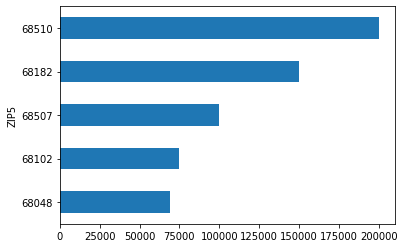

In [38]:
dfNEBR.groupby('ZIP5').Award_Amount.sum().sort_values(ascending=True).head().plot(kind='barh')

In [55]:
dfKANS.groupby('ZIP5').Award_Amount.sum().sort_values(ascending=False).head(10)

ZIP5
66046    18040517.80
66502     8759784.75
66103     3991402.00
66061     3939185.94
66214     3821038.00
66047     3558747.00
67260     3035170.00
66049     2998931.00
66044     2698602.00
66506     2225828.75
Name: Award_Amount, dtype: float64

In [56]:
dfIOWA.groupby('ZIP5').Award_Amount.sum().sort_values(ascending=False).head(10)

ZIP5
52241    19845892.00
50010    10420428.27
52245     8289077.00
52246     6061429.00
52240     5551451.00
51250     5124364.00
50014     4921780.32
52302     2863971.00
50011     2695030.95
52242     1987711.00
Name: Award_Amount, dtype: float64

In [57]:
dfMIZZO.groupby('ZIP5').Award_Amount.sum().sort_values(ascending=False).head(10)

ZIP5
63108    36859721.00
63132    23947909.52
65201    10953140.04
65203     9673893.75
65401     9406829.00
65211     8441612.00
65559     5631684.00
63006     5593074.00
63117     4841807.00
63110     4143426.00
Name: Award_Amount, dtype: float64

In [83]:
zip66502 = dfMINK[(dfMINK['ZIP5']== 66502)]
zip66503 = dfMINK[(dfMINK['ZIP5']== 66503)]
zip66506 = dfMINK[(dfMINK['ZIP5']== 66506)]
zipFrame = (zip66502, zip66503, zip66506)
dfKState = pd.concat(zipFrame)

In [84]:
dfKState.Award_Amount.sum()

11610533.5

In [85]:
dfKState.groupby('Agency').size()

Agency
Department of Agriculture                         6
Department of Defense                            11
Department of Energy                              8
Department of Health and Human Services           3
National Aeronautics and Space Administration     5
National Science Foundation                       5
dtype: int64

In [86]:
dfKState.groupby('Agency').Award_Amount.sum().sort_values(ascending=False).head(10)

Agency
Department of Defense                            4581713.75
Department of Energy                             2027351.75
Department of Agriculture                        1359392.00
Department of Health and Human Services          1346933.00
National Science Foundation                      1250000.00
National Aeronautics and Space Administration    1045143.00
Name: Award_Amount, dtype: float64

In [87]:
dfKANS.groupby('Agency').Award_Amount.sum().sort_values(ascending=False).head(10)

Agency
Department of Health and Human Services          27925773.00
Department of Defense                            16066506.49
Department of Energy                              5378446.55
National Aeronautics and Space Administration     5281916.00
Department of Agriculture                         4273168.00
National Science Foundation                       3094280.00
Department of Transportation                        98028.24
Department of Education                             74995.00
Name: Award_Amount, dtype: float64

In [88]:
dfMIZZO.groupby('Agency').Award_Amount.sum().sort_values(ascending=False).head(10)

Agency
Department of Health and Human Services          98030707.52
Department of Defense                            38946322.55
National Science Foundation                      12829788.00
Department of Energy                              8270913.00
National Aeronautics and Space Administration     7101470.00
Department of Agriculture                         2419587.00
Department of Homeland Security                   1649110.00
Department of Transportation                       281958.75
Environmental Protection Agency                    273723.76
Department of Commerce                             120000.00
Name: Award_Amount, dtype: float64

In [89]:
dfIOWA.groupby('Agency').Award_Amount.sum().sort_values(ascending=False).head(10)

Agency
Department of Health and Human Services          47055895.00
Department of Defense                            11429142.75
National Science Foundation                       8160222.00
Department of Agriculture                         5637707.00
Department of Energy                              3049494.73
Department of Education                           2299734.06
National Aeronautics and Space Administration     1098848.00
Department of Commerce                             300000.00
Name: Award_Amount, dtype: float64

In [90]:
dfNEBR.groupby('Agency').Award_Amount.sum().sort_values(ascending=False).head(10)

Agency
Department of Health and Human Services    23159597.0
Department of Defense                      14217703.0
National Science Foundation                 3717843.0
Department of Agriculture                   2469190.0
Department of Energy                        1349995.0
Department of Transportation                1014959.0
Department of Homeland Security              749996.0
Department of Commerce                       519733.0
Department of Education                       75000.0
Name: Award_Amount, dtype: float64

In [91]:
dfMINK.groupby('Agency').Award_Amount.sum().sort_values(ascending=False).head(10)

Agency
Department of Health and Human Services          1.961720e+08
Department of Defense                            8.065967e+07
National Science Foundation                      2.780213e+07
Department of Energy                             1.804885e+07
Department of Agriculture                        1.479965e+07
National Aeronautics and Space Administration    1.348223e+07
Department of Education                          2.449729e+06
Department of Homeland Security                  2.399106e+06
Department of Transportation                     1.394946e+06
Department of Commerce                           9.397330e+05
Name: Award_Amount, dtype: float64

In [65]:
dfKANS.groupby('Agency').size().sort_values(ascending=False)

Agency
Department of Health and Human Services          63
Department of Defense                            42
Department of Agriculture                        20
National Aeronautics and Space Administration    19
Department of Energy                             15
National Science Foundation                      12
Department of Transportation                      1
Department of Education                           1
dtype: int64

In [95]:
dfKANS.groupby('Award_Year').size().sort_values(ascending=False)

Award_Year
2018    22
2014    21
2012    21
2019    19
2015    19
2010    19
2013    15
2017    14
2011    14
2016     9
dtype: int64

In [105]:
dfKANS[(dfKANS['Award_Year'] == 2018)].groupby('Agency').size().sort_values(ascending=False)

Agency
Department of Health and Human Services          13
National Science Foundation                       3
National Aeronautics and Space Administration     2
Department of Energy                              2
Department of Defense                             1
Department of Agriculture                         1
dtype: int64

In [106]:
dfMIZZO[(dfMIZZO['Award_Year'] == 2018)].groupby('Agency').size().sort_values(ascending=False)

Agency
Department of Health and Human Services          32
Department of Defense                            11
National Science Foundation                       4
National Aeronautics and Space Administration     4
Department of Agriculture                         4
Department of Energy                              3
Department of Transportation                      2
Department of Commerce                            1
dtype: int64

In [107]:
dfIOWA[(dfIOWA['Award_Year'] == 2018)].groupby('Agency').size().sort_values(ascending=False)

Agency
Department of Health and Human Services    7
Department of Defense                      6
Department of Agriculture                  4
National Science Foundation                3
Department of Energy                       3
dtype: int64

In [108]:
dfNEBR[(dfNEBR['Award_Year'] == 2018)].groupby('Agency').size().sort_values(ascending=False)

Agency
Department of Health and Human Services    6
Department of Defense                      1
dtype: int64

In [104]:
dfMINK.groupby('Award_Year').size()

Award_Year
2010    117
2011     73
2012     79
2013     62
2014     85
2015     71
2016     84
2017     92
2018    113
2019     99
2020      1
dtype: int64

In [114]:
dfMINK[(dfMINK['Award_Year'] == 2018)].groupby('ZIP5').size().sort_values(ascending=False).head(10)

ZIP5
63108    16
63132     7
65201     6
66047     5
66061     4
65559     4
50014     3
65203     3
50011     3
65401     3
dtype: int64

In [115]:
dfMINK[(dfMINK['Award_Year'] == 2017)].groupby('ZIP5').size().sort_values(ascending=False).head(10)

ZIP5
63108    9
52241    7
65559    4
68430    4
63132    4
65201    3
66502    3
65203    2
65401    2
66046    2
dtype: int64

In [116]:
dfMINK[(dfMINK['Award_Year'] == 2016)].groupby('ZIP5').size().sort_values(ascending=False).head(10)

ZIP5
63132    12
63108     6
52241     6
50010     4
52246     4
66046     4
65201     3
65211     3
50011     2
63110     2
dtype: int64

In [117]:
dfMINK[(dfMINK['Award_Year'] == 2018)].groupby('ZIP5').Award_Amount.sum().sort_values(ascending=False).head(10)

ZIP5
63108    6890737.0
63132    5164715.0
68114    2812787.0
65201    2574583.1
68512    2279194.0
66061    2201637.0
52241    2067534.0
65559    1581686.0
66044    1498797.0
63146    1496822.0
Name: Award_Amount, dtype: float64

In [118]:
dfKANS[(dfKANS['Award_Year'] == 2018)].groupby('ZIP5').Award_Amount.sum().sort_values(ascending=False).head(10)

ZIP5
66061    2201637.0
66044    1498797.0
66047    1227776.0
66212     720181.0
66046     349959.0
66503     324920.0
66103     299931.0
67203     299014.0
66502     270216.0
67010     224094.0
Name: Award_Amount, dtype: float64

In [128]:
dfKANS[(dfKANS['Award_Year'] == 2018)].groupby('ZIP5').Award_Amount.sum().sort_values(ascending=False).head()

ZIP5
66061    2201637.0
66044    1498797.0
66047    1227776.0
66212     720181.0
66046     349959.0
Name: Award_Amount, dtype: float64

In [129]:
dfKANS[(dfKANS['Award_Year'] == 2018)].groupby('Agency').Award_Amount.sum().sort_values(ascending=False).head()

Agency
Department of Health and Human Services          5527155.0
National Science Foundation                      1170181.0
Department of Energy                              374048.0
National Aeronautics and Space Administration     245221.0
Department of Agriculture                          99920.0
Name: Award_Amount, dtype: float64